***KNN Classification on Iris Dataset***

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = y
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Metrics

In [5]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred, average="macro"))
print("\nRecall:", recall_score(y_test, y_pred, average="macro"))
print("\nF1 Score:", f1_score(y_test, y_pred, average="macro"))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix Plot

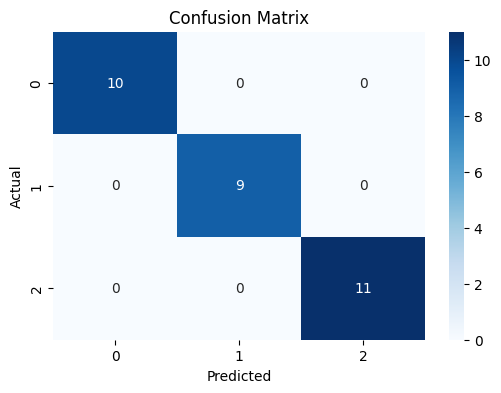

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy vs K Plot

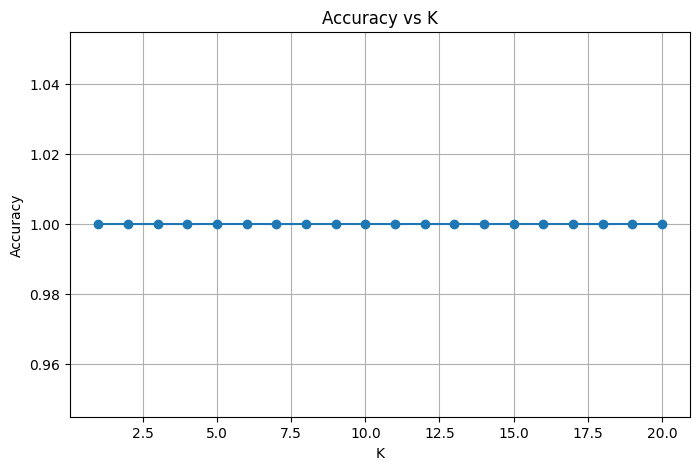

In [7]:
accuracy_list = []

for K in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, pred_k))

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), accuracy_list, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

SAVING THE MODEL

In [8]:
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\nModel and scaler saved as knn_model.pkl and scaler.pkl")



Model and scaler saved as knn_model.pkl and scaler.pkl


PREDICTION

In [10]:
loaded_scaler = pickle.load(open("scaler.pkl", "rb"))
loaded_model = pickle.load(open("knn_model.pkl", "rb"))

sample = np.array([[5.1, 3.5, 1.4, 0.2]])   # example test data
sample_scaled = loaded_scaler.transform(sample)
prediction = loaded_model.predict(sample_scaled)

print("\nSample Prediction:", iris.target_names[prediction][0])


Sample Prediction: setosa
